# Stock Price Prediction Models

In [2]:
# Stock Price Prediction Project

# Link for dataset: https://www.kaggle.com/datasets/hershyandrew/amzn-dpz-btc-ntfx-adjusted-may-2013may2019

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
import yfinance as yf
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

In [4]:
df = pd.read_csv('/content/portfolio_data.csv') # Reading the data
df

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [5]:
stock_list = ['AMZN', 'DPZ', 'BTC-USD', 'NFLX'] # List of stocks

# Setting starting and ending date
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
stock_data = {} # Initializing 'stock_data' dictionary to store data for each company

# Company names and their tickers
company_list = ['AMZN', 'DPZ'	, 'BTC-USD', 'NFLX']
company_name = ["AMAZON", "DOMINOS", "BITCOIN", "NETFLIX"]

for company, com_name in zip(company_list, company_name):
  # Getting historical data for the company using yahoo finance
    stock_data[company] = yf.download(company, start='2022-01-01', end='2023-01-01')
    stock_data[company]["company_name"] = com_name
stock_data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AMZN':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
 2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
 2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
 2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
 2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   
 ...                ...         ...         ...         ...         ...   
 2022-12-23   83.250000   85.779999   82.930000   85.250000   85.250000   
 2022-12-27   84.970001   85.349998   83.000000   83.040001   83.040001   
 2022-12-28   82.800003   83.480003   81.690002   81.820000   81.820000   
 2022-12-29   82.870003   84.550003   82.550003   84.180000   84.180000   
 2022-12-30   83.120003   84.050003   82.470001   84.000000   84.000000   
 
               

In [7]:
stock_data['AMZN'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,126.318080,128.419815,123.914148,126.098819,126.098819,7.608070e+07
std,23.918480,24.051600,23.701656,23.904315,23.904315,3.402541e+07
min,82.800003,83.480003,81.690002,81.820000,81.820000,3.508860e+07
25%,108.330498,112.386250,106.459999,108.889500,108.889500,5.508695e+07
50%,122.699997,124.400002,120.629997,122.769997,122.769997,6.653800e+07
75%,146.570000,149.645004,143.752251,145.857506,145.857506,8.508390e+07
max,170.438004,171.399994,167.868500,170.404495,170.404495,2.726620e+08


In [8]:
stock_data['AMZN'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [9]:
print(stock_list)

['AMZN', 'DPZ', 'BTC-USD', 'NFLX']


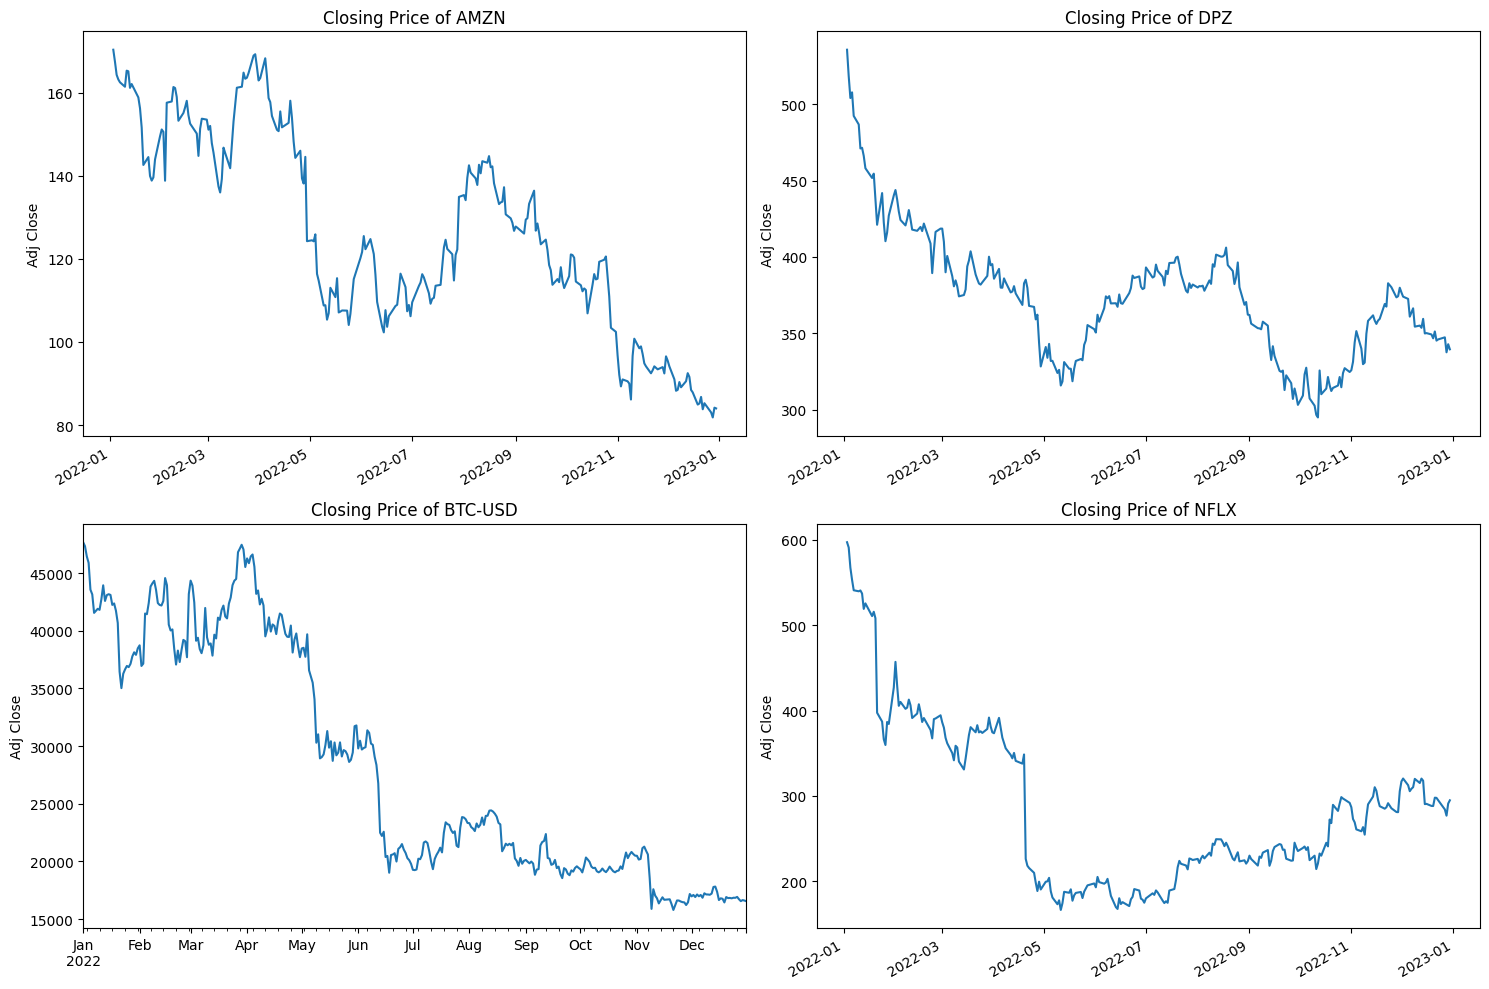

In [10]:
# Generating line plot for closing prices of the stocks
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    stock_data[company]['Adj Close'].plot() # Plotting the 'Adj Close' (Adjusted Closing Price)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")

plt.tight_layout()

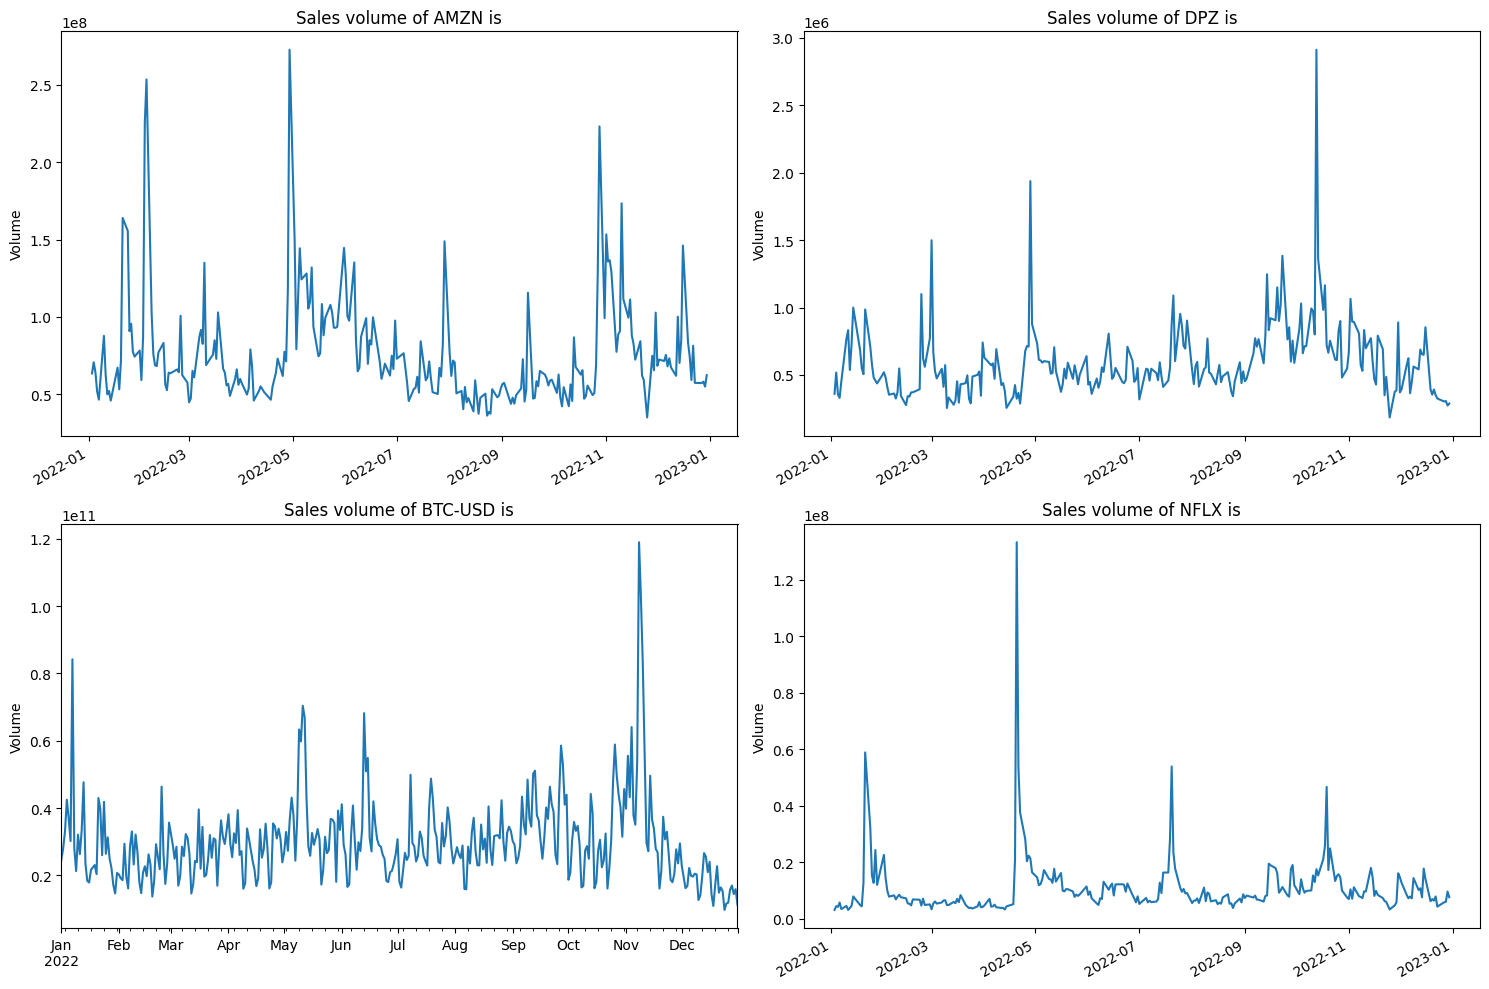

In [11]:
# Generating line plot for volume of sales of the stocks
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    stock_data[company]['Volume'].plot() # Plotting the 'Volume' (trading volume)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales volume of {stock_list[i - 1]} is")

plt.tight_layout()

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [13]:
# Moving Average of the stocks
for i in df.columns:
  df[f'{i}_MA10']= df[i].rolling(window=10).mean() # Calculating the 10-day moving average
  df[f'{i}_MA50'] = df[i].rolling(window=50).mean() # Calculating the 50-day moving average
  df[f'{i}_Lag_1'] = df[i].shift(1)
df.head(15)

,AMZN,DPZ,BTC,NFLX,AMZN_MA10,AMZN_MA50,AMZN_Lag_1,DPZ_MA10,DPZ_MA50,DPZ_Lag_1,BTC_MA10,BTC_MA50,BTC_Lag_1,NFLX_MA10,NFLX_MA50,NFLX_Lag_1
Date,,,,,,,,,,,,,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,252.550003,51.987320,98.099998,30.641428,NaN,NaN,248.229996,NaN,NaN,51.190983,NaN,NaN,106.250000,NaN,NaN,30.415714
2013-05-03,258.049988,52.446388,112.900002,30.492857,NaN,NaN,252.550003,NaN,NaN,51.987320,NaN,NaN,98.099998,NaN,NaN,30.641428
2013-05-06,255.720001,53.205257,109.599998,30.098572,NaN,NaN,258.049988,NaN,NaN,52.446388,NaN,NaN,112.900002,NaN,NaN,30.492857
2013-05-07,257.730011,54.151505,113.199997,29.464285,NaN,NaN,255.720001,NaN,NaN,53.205257,NaN,NaN,109.599998,NaN,NaN,30.098572
2013-05-08,258.679993,54.385727,112.800003,29.801428,NaN,NaN,257.730011,NaN,NaN,54.151505,NaN,NaN,113.199997,NaN,NaN,29.464285
2013-05-09,260.160004,54.020340,117.699997,30.915714,NaN,NaN,258.679993,NaN,NaN,54.385727,NaN,NaN,112.800003,NaN,NaN,29.801428
2013-05-10,263.630005,54.357620,115.639999,31.098572,NaN,NaN,260.160004,NaN,NaN,54.020340,NaN,NaN,117.699997,NaN,NaN,30.915714
2013-05-13,264.510010,54.573097,111.400002,32.768570,NaN,NaN,263.630005,NaN,NaN,54.357620,NaN,NaN,115.639999,NaN,NaN,31.098572


In [14]:
df.dropna(inplace=True)

In [15]:
df['AMZN'].describe()

,AMZN
count,1471.000000
mean,839.885324
std,517.004834
min,280.929993
25%,374.345001
50%,715.619995
75%,1140.529968
max,2039.510010


In [16]:
X = df[['AMZN_Lag_1', 'AMZN_MA10', 'AMZN_MA50']] # Features for model training
y = df['AMZN'] # Traget values

In [17]:
# Splitting the dataset into training and testing sets as 80% - 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [18]:
df.columns = df.columns.str.strip()

In [19]:
# LinearRegression model
predmodel =  LinearRegression()
predmodel.fit(X_train, y_train) # Training the model using the data

LinearRegression()

In [20]:
y_pred = predmodel.predict(X_test) # Using the trained model to make predictions on the test data

In [21]:
# Calculating the mean squared error between the actual values (y_test) and the predicted values (y_pred)
mean_squared_error(y_test, y_pred)

1304.0305018497952

In [22]:
# Calculating the R2 score between the actual values (y_test) and the predicted values (y_pred)
r2_score(y_test, y_pred)

0.9454174655113368

In [23]:
# Predicting using the trained LinearRegression model on the test values
predictions = predmodel.predict(X_test)
print(predictions)

[1600.55976125 1592.00854745 1595.43367837 1588.21446235 1578.63680214
 1554.73479158 1592.79494629 1588.34679607 1553.67643377 1508.18412515
 1561.81003549 1506.41861722 1445.10828396 1457.17458269 1386.8459793
 1402.95336187 1418.20057446 1453.94634481 1410.599897   1409.94024479
 1436.49662481 1428.36060205 1447.6666603  1432.37080394 1443.39040115
 1501.35289342 1524.36101076 1552.17130631 1526.67862522 1518.15208915
 1466.01106883 1466.85601    1520.99125176 1572.08702064 1567.05320531
 1582.15741394 1570.86227855 1573.62976291 1582.61565333 1601.58583541
 1596.24622328 1611.46323346 1612.75043093 1607.51395047 1606.17111137
 1583.25553869 1593.49387775 1588.38899467 1581.49660454 1591.45252103
 1587.68390758 1606.19958664 1607.37140931 1613.91956141 1616.9299288
 1628.33315843 1633.31010227 1645.1599499  1667.93972638 1697.46885239
 1697.86588697 1692.84073859 1688.83355543 1694.35450646 1703.90151802
 1710.4183982  1728.43800629 1721.8074731  1729.21058598 1739.68956916
 1753.93

In [24]:
print(stock_data['AMZN'].columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')


In [25]:
# Using moving average values for 10, 50 days and lagged values for data visualization
stock_data['AMZN']['AMZN_MA10'] = stock_data['AMZN']['Adj Close'].rolling(window=10).mean()
stock_data['AMZN']['AMZN_MA50'] = stock_data['AMZN']['Adj Close'].rolling(window=50).mean()
stock_data['AMZN']['AMZN_Lag_1'] = stock_data['AMZN']['Adj Close'].shift(1)

In [26]:
stock_data['DPZ']['DPZ_MA10'] = stock_data['DPZ']['Adj Close'].rolling(window=10).mean()
stock_data['DPZ']['DPZ_MA50'] = stock_data['DPZ']['Adj Close'].rolling(window=50).mean()
stock_data['DPZ']['DPZ_Lag_1'] = stock_data['DPZ']['Adj Close'].shift(1)

In [27]:
stock_data['BTC-USD']['BTC-USD_MA10'] = stock_data['BTC-USD']['Adj Close'].rolling(window=10).mean()
stock_data['BTC-USD']['BTC-USD_MA50'] = stock_data['BTC-USD']['Adj Close'].rolling(window=50).mean()
stock_data['BTC-USD']['BTC-USD_Lag_1'] = stock_data['BTC-USD']['Adj Close'].shift(1)

In [28]:
stock_data['NFLX']['NFLX_MA10'] = stock_data['NFLX']['Adj Close'].rolling(window=10).mean()
stock_data['NFLX']['NFLX_MA50'] = stock_data['NFLX']['Adj Close'].rolling(window=50).mean()
stock_data['NFLX']['NFLX_Lag_1'] = stock_data['NFLX']['Adj Close'].shift(1)

Text(0.5, 1.0, 'Netflix')

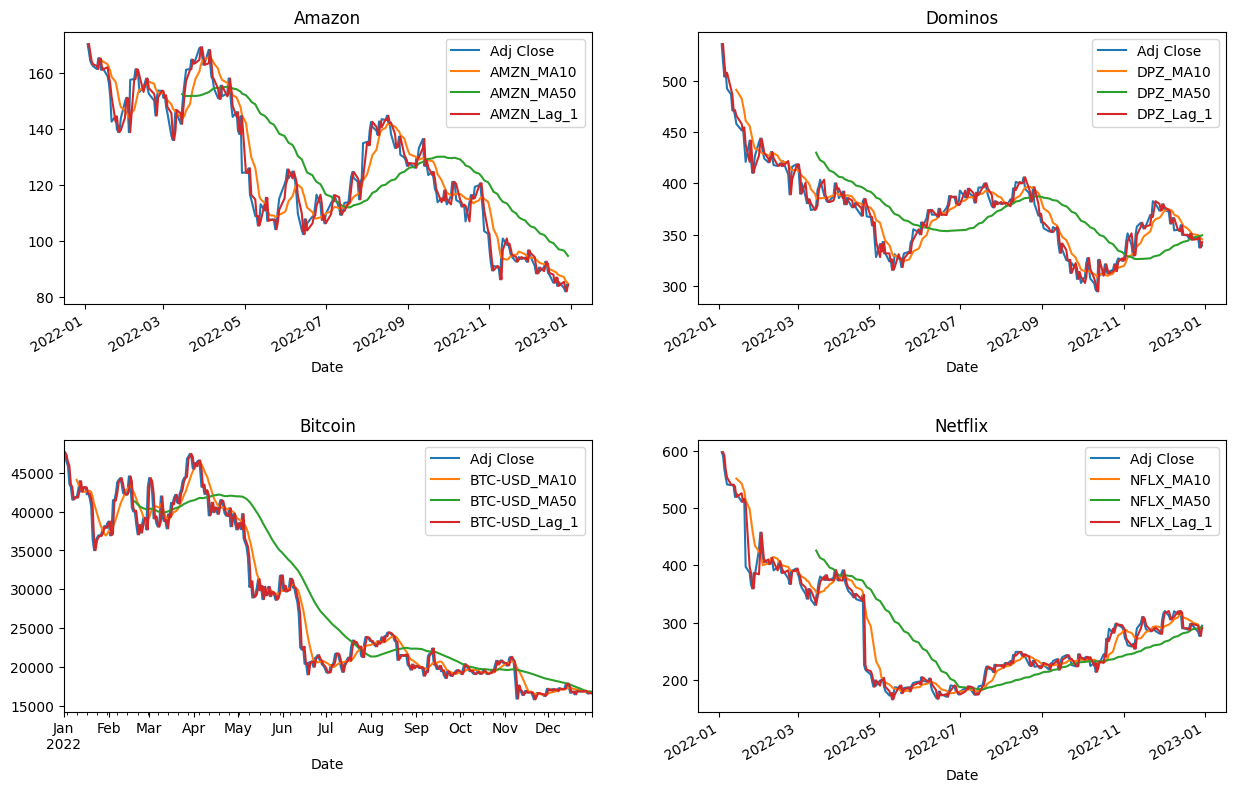

In [29]:
# visualizing the data
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)
stock_data['AMZN'][['Adj Close', 'AMZN_MA10', 'AMZN_MA50', 'AMZN_Lag_1']].plot(ax=axes[0,0])
axes[0,0].set_title('Amazon')

stock_data['DPZ'][['Adj Close', 'DPZ_MA10', 'DPZ_MA50', 'DPZ_Lag_1']].plot(ax=axes[0,1])
axes[0,1].set_title('Dominos')

stock_data['BTC-USD'][['Adj Close', 'BTC-USD_MA10', 'BTC-USD_MA50', 'BTC-USD_Lag_1']].plot(ax=axes[1,0])
axes[1,0].set_title('Bitcoin')

stock_data['NFLX'][['Adj Close', 'NFLX_MA10', 'NFLX_MA50', 'NFLX_Lag_1']].plot(ax=axes[1,1])
axes[1,1].set_title('Netflix')

Text(0.5, 1.0, 'Netflix')

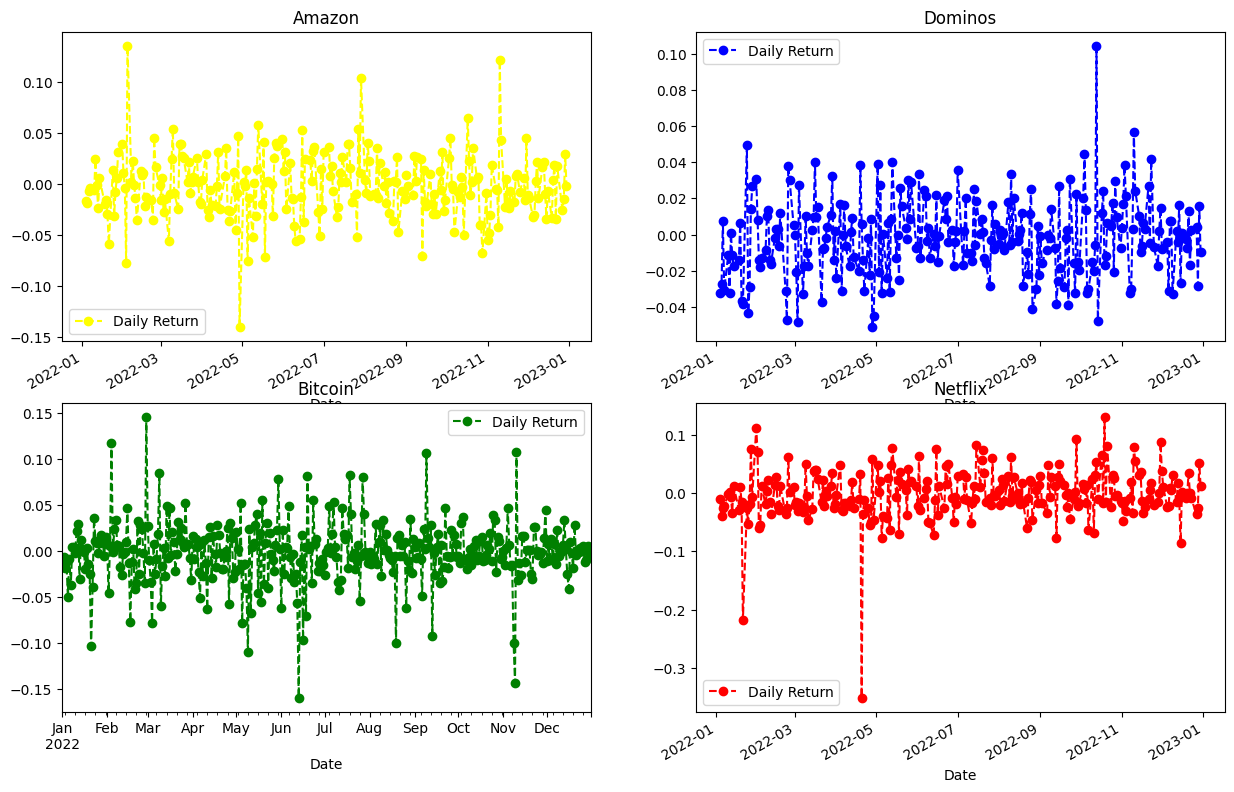

In [30]:
# Calculating the daily return for each company by computing the percentage change and visualizing the data using 'Adj Close'

for company in company_list:
  # Adding a new column 'Daily Return' in the stock_data DataFrame
    stock_data[company]['Daily Return'] = stock_data[company]['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_data['AMZN']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',color='yellow')
axes[0,0].set_title('Amazon')

stock_data['DPZ']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', color='blue')
axes[0,1].set_title('Dominos')

stock_data['BTC-USD']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', color='green')
axes[1,0].set_title('Bitcoin')

stock_data['NFLX']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', color='red')
axes[1,1].set_title('Netflix')

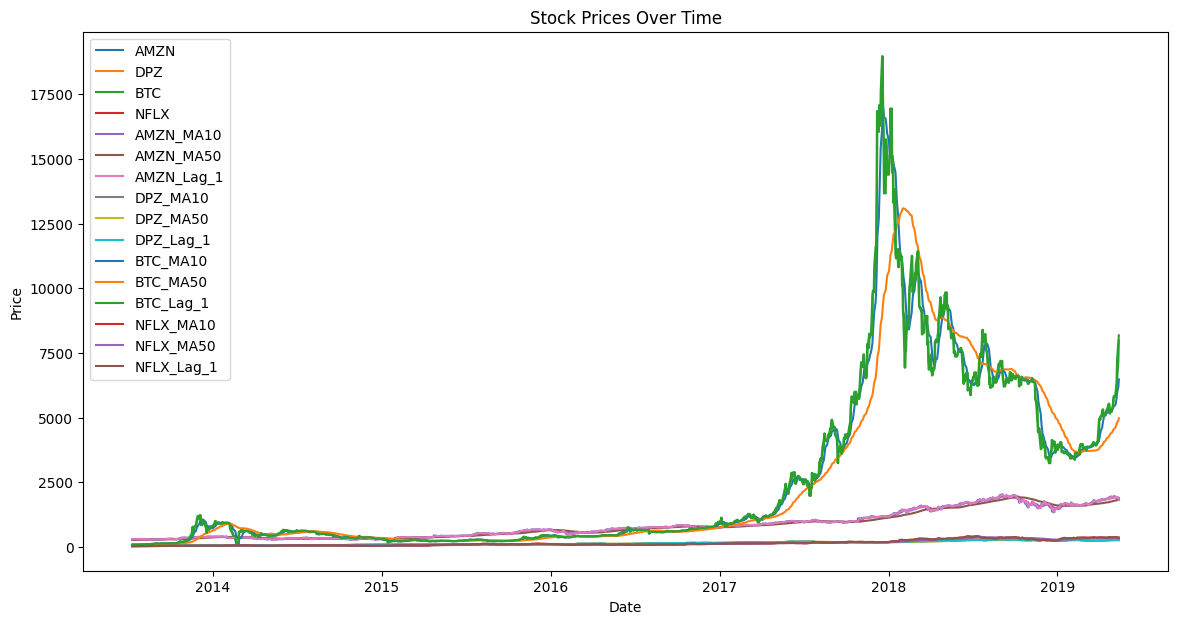

In [31]:
# Plotting each stock's prices over time on the same plot
plt.figure(figsize=(14, 7))

for stock in df.columns:
    plt.plot(df.index, df[stock], label=stock)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()